In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [13]:
portfolio = ['AAPL', 'MSFT', 'PG', 'DIS']
mydata = pd.DataFrame()
for p in portfolio:
    mydata[p] = wb.DataReader(p, data_source= 'yahoo', start=(1995-1-1))['Adj Close']

In [14]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6916 entries, 1993-01-04 to 2020-06-18
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    6916 non-null   float64
 1   MSFT    6916 non-null   float64
 2   PG      6916 non-null   float64
 3   DIS     6916 non-null   float64
dtypes: float64(4)
memory usage: 270.2 KB


In [17]:
mydata.head()

,AAPL,MSFT,PG,DIS
Date,,,,
1993-01-04,1.734435,1.702030,4.474402,9.739946
1993-01-05,1.764210,1.729522,4.453393,9.833628
1993-01-06,1.838650,1.779508,4.369367,10.062315
1993-01-07,1.816318,1.744518,4.306350,9.862214
1993-01-08,1.853538,1.742019,4.180309,9.862214


In [18]:
mydata.tail()

,AAPL,MSFT,PG,DIS
Date,,,,
2020-06-12,338.799988,187.740005,115.620003,115.489998
2020-06-15,342.989990,188.940002,116.690002,117.080002
2020-06-16,352.079987,193.570007,118.129997,118.440002
2020-06-17,351.589996,194.240005,117.930000,117.650002
2020-06-18,352.359985,195.610001,118.669998,117.589996


In [22]:
mydata.iloc[0]

AAPL    1.734435
MSFT    1.702030
PG      4.474402
DIS     9.739946
Name: 1993-01-04 00:00:00, dtype: float64

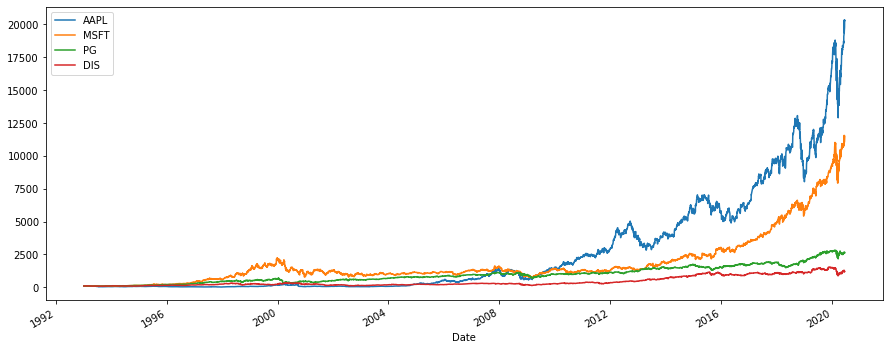

In [23]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

In [24]:
mydata.loc['1995-01-03']

AAPL     1.173059
MSFT     2.406834
PG       6.320252
DIS     11.100247
Name: 1995-01-03 00:00:00, dtype: float64

In [25]:
returns = (mydata / mydata.shift(1)) -1
returns.head()

,AAPL,MSFT,PG,DIS
Date,,,,
1993-01-04,NaN,NaN,NaN,NaN
1993-01-05,0.017167,0.016152,-0.004696,0.009618
1993-01-06,0.042194,0.028902,-0.018868,0.023256
1993-01-07,-0.012146,-0.019663,-0.014422,-0.019886
1993-01-08,0.020492,-0.001433,-0.029269,0.000000


In [26]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [27]:
np.dot(returns, weights)

array([        nan,  0.00956049,  0.01887098, ...,  0.01874093,
       -0.00157338,  0.003752  ])

In [28]:
annual_returns = returns.mean() *250
annual_returns

AAPL    0.292245
MSFT    0.220990
PG      0.144209
DIS     0.135186
dtype: float64

In [29]:
np.dot(annual_returns, weights)

0.19815759704621916

In [30]:
pfolio_1 = (str(round(np.dot(annual_returns, weights), 5) *100) + '%')
print(pfolio_1)

19.816%


In [31]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [33]:
pfolio_2 = (str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%')
print (pfolio_1)
print (pfolio_2)

19.816%
23.368%
